# AM 207: LUNA
## NLM Experiments

In [1]:
import sys; sys.path.insert(0, "..")
from src.models import NLM
from src.utils import generate_data

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

## Generate Synthetic Data

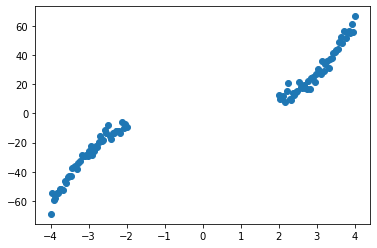

In [3]:
x, y, x_test = generate_data(number_of_points=50, noise_variance=9)

plt.scatter(x, y)
plt.show()

## Regularization

**Question**: At what regularization level does good epistemic uncertainty behavior collapse?

### Setup NLM

In [4]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

width = [50,20] # using the architecture used in the paper
hidden_layers = len(width)
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = NLM(architecture, random=random)
print('Number of parameters =',nn.D)

###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':5000, 
          'random_restarts':1}

Number of parameters = 1141


### Regularziation Parameter Search

In [5]:
reg_params = [0, 0.001, 0.01, 0.1, 1, 10, 50, 100]

In [6]:
nlms = []

for reg_param in reg_params:
    print("Regulariation parameter: {}".format(reg_param))
    params['reg_param'] = reg_param
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Regulariation parameter: 0
Iteration 0 loss 4915.849082289788; gradient mag: 7337.065653099054
Iteration 100 loss 759.220924733871; gradient mag: 1914.4876575902617
Iteration 200 loss 183.75417092215113; gradient mag: 512.8482122557932
Iteration 300 loss 135.44308259577625; gradient mag: 75.15488486770782
Iteration 400 loss 127.31354229170795; gradient mag: 60.57388208826603
Iteration 500 loss 119.31203239493404; gradient mag: 58.28457439974005
Iteration 600 loss 111.24397197442626; gradient mag: 52.51248543601198
Iteration 700 loss 103.20042332552684; gradient mag: 49.05887582717954
Iteration 800 loss 95.24430662423607; gradient mag: 46.66445436181996
Iteration 900 loss 87.40719095176428; gradient mag: 44.47507570177773
Iteration 1000 loss 79.72827569361813; gradient mag: 42.63490358973714
Iteration 1100 loss 72.1616692656283; gradient mag: 41.22766498853635
Iteration 1200 loss 62.937926871603985; gradient mag: 44.73814993427782
Iteration 1300 loss 51.124488735065015; gradient mag: 38

Iteration 1400 loss 9.439965695745478; gradient mag: 7.7219921845863
Iteration 1500 loss 8.910918600661743; gradient mag: 6.670321285349193
Iteration 1600 loss 8.470750805956072; gradient mag: 3.6417413091237427
Iteration 1700 loss 8.335853666601327; gradient mag: 2.9215604123724197
Iteration 1800 loss 8.168280370565551; gradient mag: 5.783246483926597
Iteration 1900 loss 7.875058915511538; gradient mag: 2.962966916663045
Iteration 2000 loss 7.775501855051285; gradient mag: 2.5603019462100276
Iteration 2100 loss 7.718994147230505; gradient mag: 2.4452093300916222
Iteration 2200 loss 7.683643411776741; gradient mag: 2.4937047114984425
Iteration 2300 loss 7.6545476129696635; gradient mag: 1.0835277026563337
Iteration 2400 loss 7.631049608800324; gradient mag: 1.0974117319362071
Iteration 2500 loss 7.611299735741472; gradient mag: 1.4319598171655366
Iteration 2600 loss 7.59644472059093; gradient mag: 1.6777796398004776
Iteration 2700 loss 7.583570589113102; gradient mag: 2.118384284577486

Iteration 2800 loss 31.67956163149409; gradient mag: 1.1863867035684272
Iteration 2900 loss 31.457583066029333; gradient mag: 1.6011906034010894
Iteration 3000 loss 31.25079064829962; gradient mag: 1.7033596539919804
Iteration 3100 loss 31.048744866626016; gradient mag: 1.385591825242852
Iteration 3200 loss 30.850935143279735; gradient mag: 2.00538295237931
Iteration 3300 loss 30.65725695521935; gradient mag: 2.59827594433845
Iteration 3400 loss 30.46618025034392; gradient mag: 1.129494787400469
Iteration 3500 loss 30.276718567117825; gradient mag: 1.7164252871652392
Iteration 3600 loss 30.090591383602707; gradient mag: 1.0260366493447177
Iteration 3700 loss 29.907360398564656; gradient mag: 1.53650138555371
Iteration 3800 loss 29.728265366351536; gradient mag: 1.7503759810296189
Iteration 3900 loss 29.548466927557907; gradient mag: 1.3656283539781726
Iteration 4000 loss 29.375956395056953; gradient mag: 1.4229061343622424
Iteration 4100 loss 29.20459884377932; gradient mag: 1.96844045

Iteration 4200 loss 381.1516607303439; gradient mag: 4.2948264494866475
Iteration 4300 loss 381.14990678626856; gradient mag: 7.687867486873853
Iteration 4400 loss 381.14645549117944; gradient mag: 4.107954615240222
Iteration 4500 loss 381.1453274169478; gradient mag: 9.20610492365337
Iteration 4600 loss 381.1415758997146; gradient mag: 5.211563219184458
Iteration 4700 loss 381.13969219307086; gradient mag: 5.499316038400639
Iteration 4800 loss 381.1380221886881; gradient mag: 7.0573885552194975
Iteration 4900 loss 381.136405636296; gradient mag: 9.558285164939337

Regulariation parameter: 100
Iteration 0 loss 4391.348297569806; gradient mag: 2905.510414809863
Iteration 100 loss 3339.3784773879506; gradient mag: 127.70942160951022
Iteration 200 loss 3139.139471345445; gradient mag: 119.54211595299566
Iteration 300 loss 2946.611377591016; gradient mag: 116.52727361935985
Iteration 400 loss 2762.607641296133; gradient mag: 109.46894440626885
Iteration 500 loss 2585.8889677198936; gradien

### Trace Plots

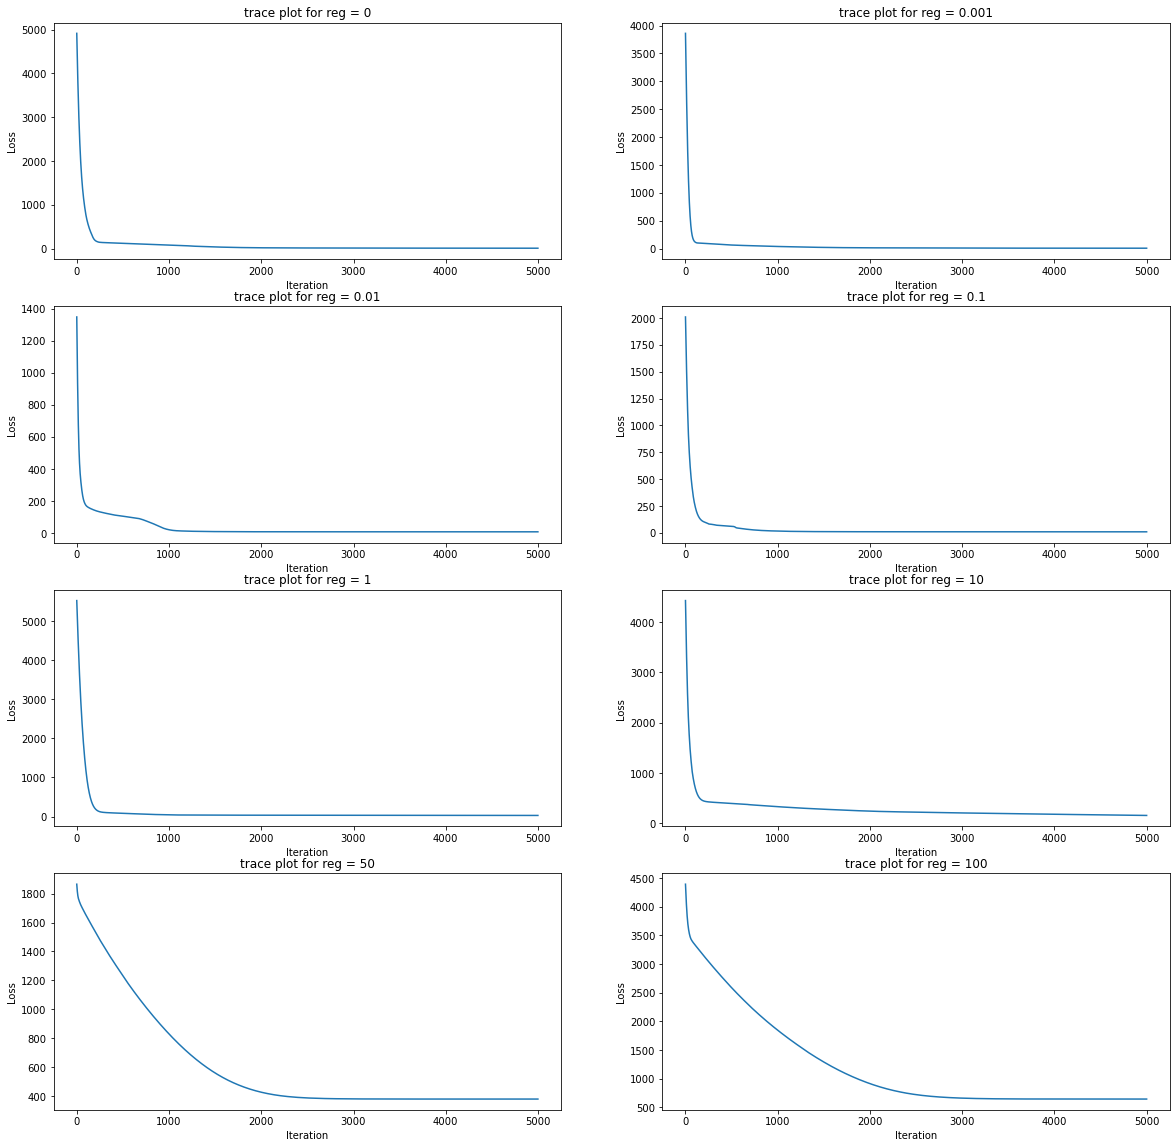

In [7]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    ax.plot(nlms[i].objective_trace)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')
    ax.set_title("trace plot for reg = {}".format(reg_params[i]))

plt.show()

### MAP Models

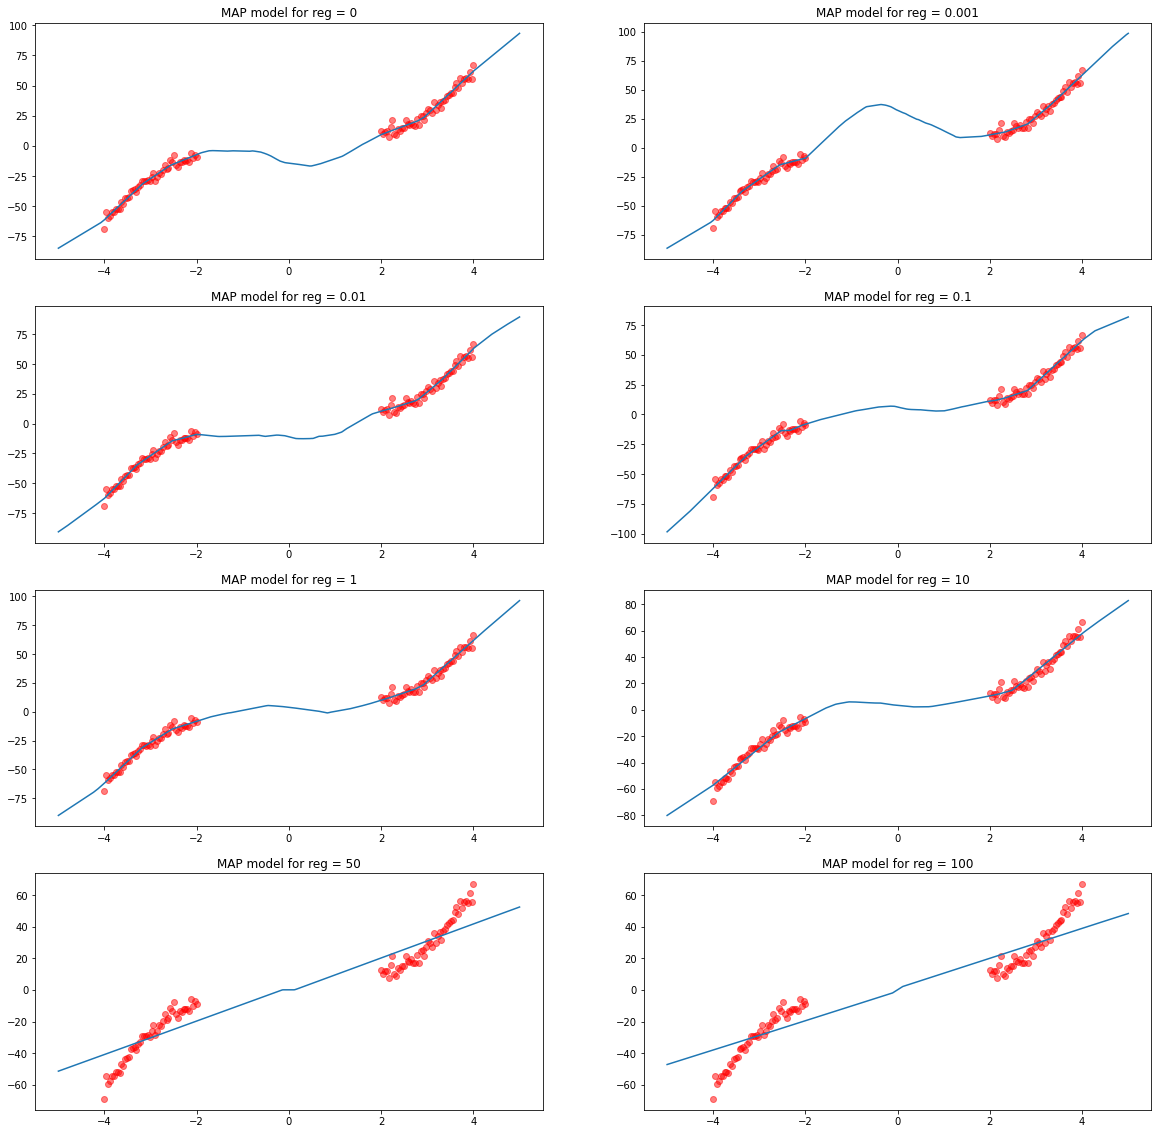

In [8]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_pred = nlm.forward(nlm.weights, x_test)

    ax.scatter(x, y, color = 'r', alpha = 0.5)
    ax.plot(x_test[0, :], y_pred.flatten())

    ax.set_title("MAP model for reg = {}".format(reg_params[i]))

plt.show()

### Prior Samples

In [9]:
prior_var = 5**2
noise_var = 3

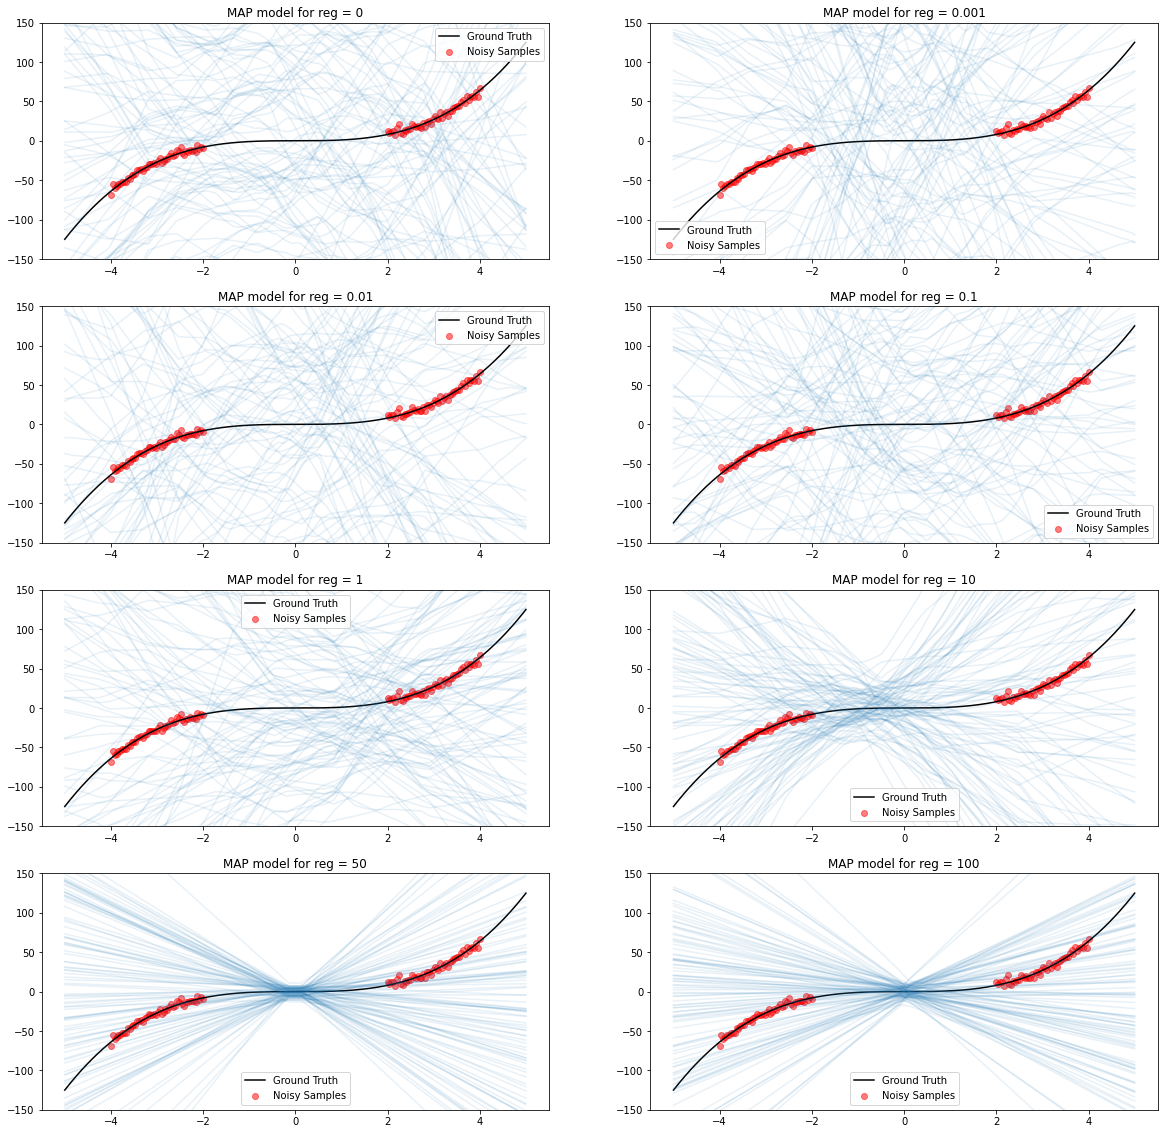

In [10]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = 0, w_prior_cov = prior_var, noise_var = noise_var)
        
    ax.scatter(x,y, color='red', alpha = 0.5, label='Noisy Samples')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("MAP model for reg = {}".format(reg_params[i]))

plt.show()

### Posterior Samples

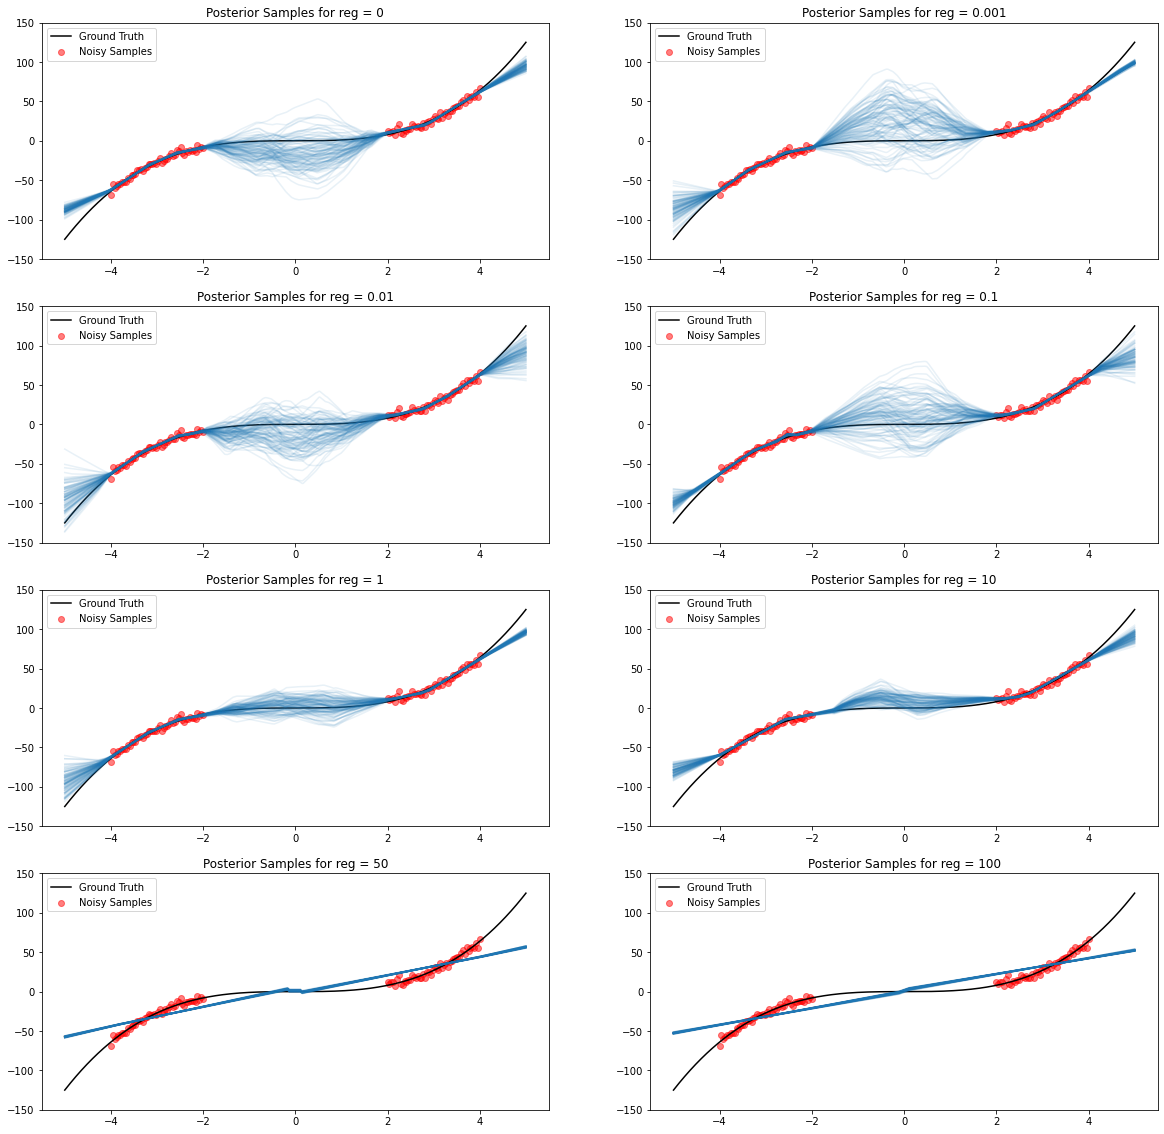

In [11]:
posteriors = []

fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    
    posteriors.append(y_posterior)
    
    ax.scatter(x, y, color='red', alpha = 0.5, label='Noisy Samples')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("Posterior Samples for reg = {}".format(reg_params[i]))

plt.show()

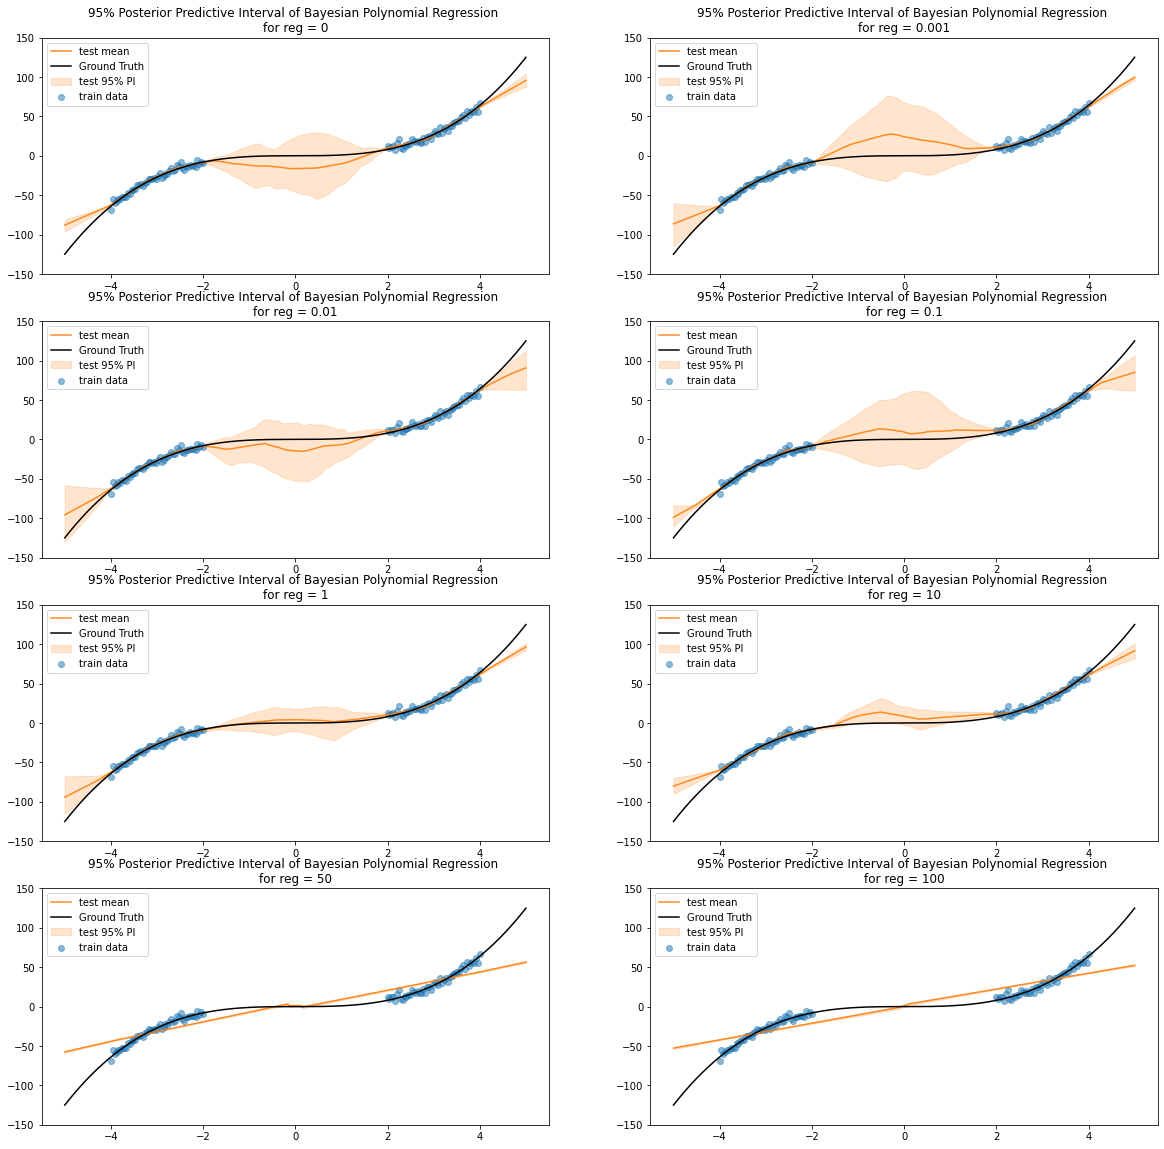

In [12]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    posterior = posteriors[i]
    
    # Calulating percentiles
    pp_upper = np.percentile(posterior, 97.5, axis=0)
    pp_lower = np.percentile(posterior, 2.5, axis=0)
    pp_mean = np.mean(posterior, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test[0,:], pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval of Bayesian Polynomial Regression \nfor reg = {}".format(reg_params[i]))

plt.show()

### Regularization Parameters: [0.0001, 1]

In [13]:
reg_params = [0, 0.005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

In [14]:
nlms = []

for reg_param in reg_params:
    print("Regulariation parameter: {}".format(reg_param))
    params['reg_param'] = reg_param
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Regulariation parameter: 0
Iteration 0 loss 23639.06350251824; gradient mag: 32069.19098075773
Iteration 100 loss 4135.856056245598; gradient mag: 11266.274694692414
Iteration 200 loss 441.05890978611933; gradient mag: 3515.4589538018195
Iteration 300 loss 69.42905732961341; gradient mag: 609.4107722050239
Iteration 400 loss 52.00893318026467; gradient mag: 121.99264122211163
Iteration 500 loss 44.24431371690321; gradient mag: 126.65023715284686
Iteration 600 loss 36.01099638156897; gradient mag: 139.1069005053783
Iteration 700 loss 28.287021706717628; gradient mag: 99.51382412451558
Iteration 800 loss 25.2071455407711; gradient mag: 48.30676294247316
Iteration 900 loss 23.34394946861914; gradient mag: 42.23015319318931
Iteration 1000 loss 21.651228402221115; gradient mag: 35.3475121999208
Iteration 1100 loss 20.14107723047789; gradient mag: 33.53564850398087
Iteration 1200 loss 18.7041776800741; gradient mag: 31.668942783318872
Iteration 1300 loss 17.506963914574047; gradient mag: 27.

Iteration 1400 loss 10.988902682298674; gradient mag: 10.230966186970853
Iteration 1500 loss 10.244112819586709; gradient mag: 10.131373634553686
Iteration 1600 loss 9.805321665827186; gradient mag: 6.665797448452246
Iteration 1700 loss 9.437921851893877; gradient mag: 5.214724716374761
Iteration 1800 loss 9.183888902249253; gradient mag: 3.6369040985782264
Iteration 1900 loss 8.999249458966066; gradient mag: 2.8610252540575414
Iteration 2000 loss 8.845182284585434; gradient mag: 2.5098707532911835
Iteration 2100 loss 8.711040408388516; gradient mag: 2.2519825763979324
Iteration 2200 loss 8.601954044252567; gradient mag: 2.44808512557487
Iteration 2300 loss 8.410115646728002; gradient mag: 2.862670443211614
Iteration 2400 loss 8.270864653924532; gradient mag: 2.237072181233236
Iteration 2500 loss 8.181431447295349; gradient mag: 1.905920990940594
Iteration 2600 loss 8.116997830550096; gradient mag: 1.5106867059594675
Iteration 2700 loss 8.061531639801407; gradient mag: 1.27188258358494

Iteration 2900 loss 7.367168219579051; gradient mag: 3.5547568590215746
Iteration 3000 loss 7.364508013345113; gradient mag: 1.1678125344383155
Iteration 3100 loss 7.362643471781834; gradient mag: 2.492687407239732
Iteration 3200 loss 7.36048634022704; gradient mag: 1.3643178849452802
Iteration 3300 loss 7.359273252962861; gradient mag: 2.72320720439572
Iteration 3400 loss 7.357356726883812; gradient mag: 2.1740085605149173
Iteration 3500 loss 7.356145237397316; gradient mag: 2.4965373418544368
Iteration 3600 loss 7.3559920535535435; gradient mag: 7.60233214076103
Iteration 3700 loss 7.352994022904617; gradient mag: 1.9913540679642199
Iteration 3800 loss 7.351869487568366; gradient mag: 4.80262569490351
Iteration 3900 loss 7.349586587750123; gradient mag: 3.601512343962714
Iteration 4000 loss 7.349700538050135; gradient mag: 5.234582888472817
Iteration 4100 loss 7.347303310633597; gradient mag: 2.935624772363378
Iteration 4200 loss 7.346238657505036; gradient mag: 0.836835336946662
Ite

Iteration 4300 loss 9.900009399802961; gradient mag: 2.654846329779176
Iteration 4400 loss 9.8883763998213; gradient mag: 3.6755056260639383
Iteration 4500 loss 9.877095217432423; gradient mag: 3.20348417374826
Iteration 4600 loss 9.865164701338465; gradient mag: 3.501831596065049
Iteration 4700 loss 9.829745692194033; gradient mag: 2.6422315117618944
Iteration 4800 loss 9.814777487935833; gradient mag: 2.385822976493101
Iteration 4900 loss 9.804370714227607; gradient mag: 5.797985932890363

Regulariation parameter: 0.5
Iteration 0 loss 4154.7870265026295; gradient mag: 9883.063415148126
Iteration 100 loss 240.63543091098427; gradient mag: 1341.405097851475
Iteration 200 loss 106.18446721510952; gradient mag: 149.6722767141642
Iteration 300 loss 88.10510822946692; gradient mag: 87.30278893732294
Iteration 400 loss 74.79607841730599; gradient mag: 71.83061657428254
Iteration 500 loss 65.22595596033818; gradient mag: 60.97694630684369
Iteration 600 loss 58.427967396490644; gradient mag: 

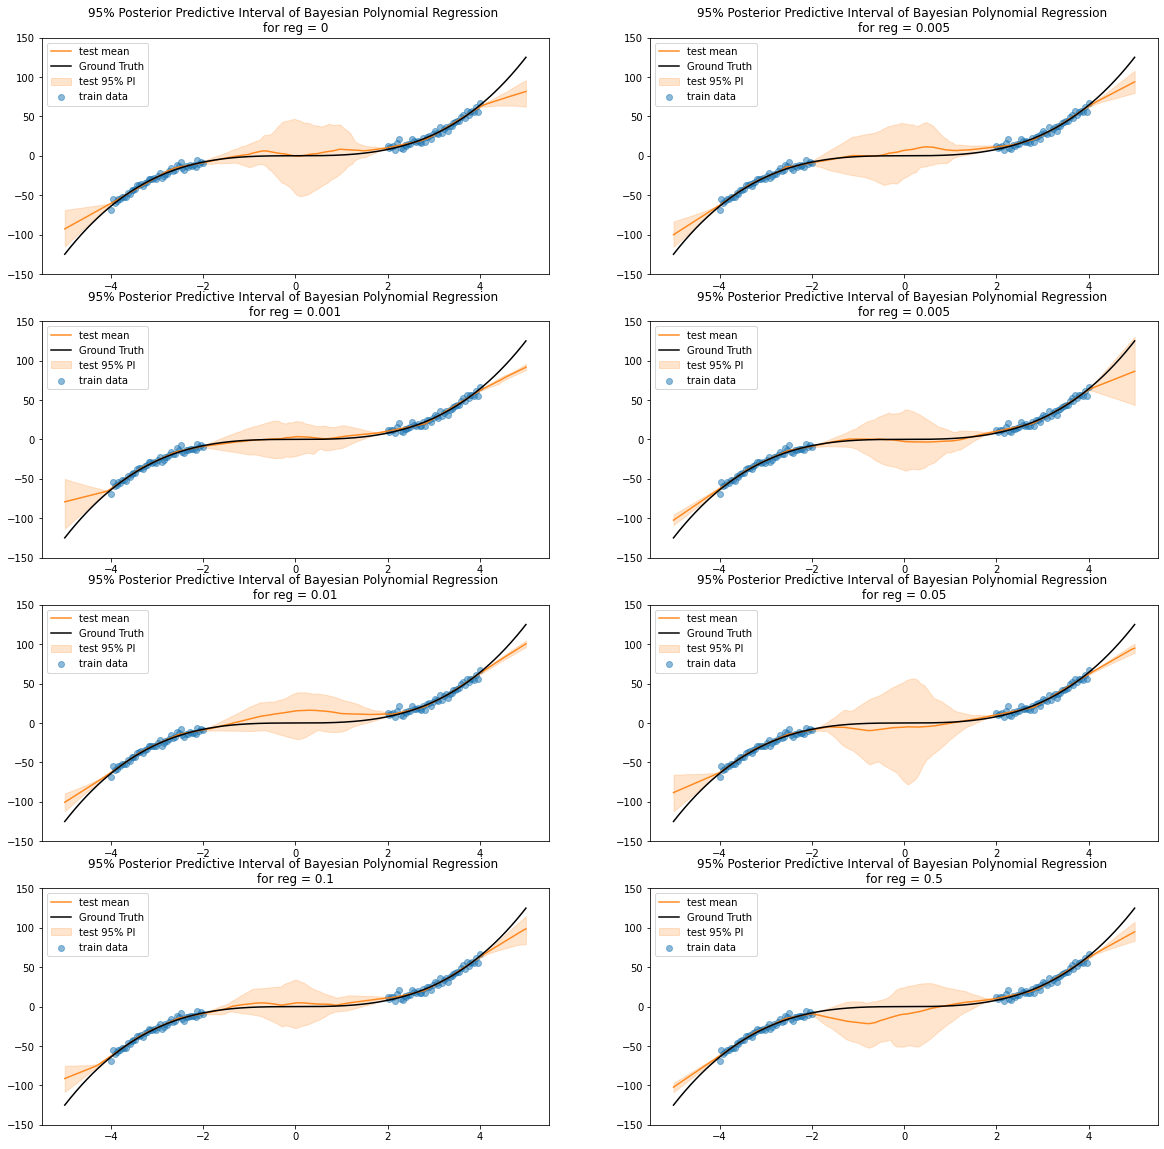

In [15]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    
    # Calulating percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test[0, :], pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test[0, :], pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test[0, :], x_test[0, :]**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval of Bayesian Polynomial Regression \nfor reg = {}".format(reg_params[i]))

plt.show()

### Regularization Parameters: [0.05, 1]

In [16]:
reg_params = [0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

In [17]:
nlms = []

for reg_param in reg_params:
    print("Regulariation parameter: {}".format(reg_param))
    params['reg_param'] = reg_param
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Regulariation parameter: 0.05
Iteration 0 loss 4772.778847301373; gradient mag: 6129.869042905545
Iteration 100 loss 762.8782807784278; gradient mag: 2283.331441517364
Iteration 200 loss 180.47578231744447; gradient mag: 415.2980000019507
Iteration 300 loss 153.37904281010466; gradient mag: 93.35826913556818
Iteration 400 loss 143.27444309843602; gradient mag: 83.46319093285224
Iteration 500 loss 132.19700369611874; gradient mag: 88.4820633330096
Iteration 600 loss 120.54509562247942; gradient mag: 82.22648181485917
Iteration 700 loss 109.4043763747699; gradient mag: 67.01668076893938
Iteration 800 loss 88.16038385055785; gradient mag: 54.536754153022564
Iteration 900 loss 76.80838049228183; gradient mag: 44.45386825969186
Iteration 1000 loss 66.5939473055124; gradient mag: 41.794112446331106
Iteration 1100 loss 57.24870520736538; gradient mag: 38.18673160955636
Iteration 1200 loss 48.82130950700584; gradient mag: 35.33338787235993
Iteration 1300 loss 41.371013469800076; gradient mag: 

Iteration 1400 loss 11.334528680271475; gradient mag: 1.7810425731083226
Iteration 1500 loss 11.180859398430336; gradient mag: 2.330126803891791
Iteration 1600 loss 11.033175504117022; gradient mag: 2.089532610859488
Iteration 1700 loss 10.92404982356313; gradient mag: 1.573210276881258
Iteration 1800 loss 10.832241405811768; gradient mag: 1.2143015649436903
Iteration 1900 loss 10.750391521306513; gradient mag: 1.2927882502062695
Iteration 2000 loss 10.67410801496087; gradient mag: 1.2441947159489657
Iteration 2100 loss 10.605515759245035; gradient mag: 3.0775308710972133
Iteration 2200 loss 10.536993768489763; gradient mag: 1.5855634830311724
Iteration 2300 loss 10.468137054299051; gradient mag: 1.9536259015958974
Iteration 2400 loss 10.408820248347858; gradient mag: 2.356407615160843
Iteration 2500 loss 10.362027371471962; gradient mag: 3.0241175897594057
Iteration 2600 loss 10.327067582199643; gradient mag: 2.3843780274168433
Iteration 2700 loss 10.299758995325625; gradient mag: 2.9

Iteration 2700 loss 15.555209945966435; gradient mag: 3.8715413701952155
Iteration 2800 loss 15.4421454157568; gradient mag: 2.8514757022173183
Iteration 2900 loss 15.324147309908955; gradient mag: 3.0621337449075035
Iteration 3000 loss 15.199380616205106; gradient mag: 3.297982133653988
Iteration 3100 loss 15.00004154839773; gradient mag: 5.491149841871296
Iteration 3200 loss 14.750544817777605; gradient mag: 4.1144478703671785
Iteration 3300 loss 14.496245563542509; gradient mag: 3.159735826001808
Iteration 3400 loss 14.249942631487869; gradient mag: 13.375805433319025
Iteration 3500 loss 14.022778847389262; gradient mag: 3.7201092126797057
Iteration 3600 loss 13.815335652864068; gradient mag: 5.865966708701007
Iteration 3700 loss 13.63417167628209; gradient mag: 3.399976101927835
Iteration 3800 loss 13.481949885187545; gradient mag: 2.759705440955804
Iteration 3900 loss 13.360010943583672; gradient mag: 3.132949882797864
Iteration 4000 loss 13.264558400270069; gradient mag: 3.246931

Iteration 4100 loss 15.447076606204725; gradient mag: 1.3891453003923837
Iteration 4200 loss 15.408586883825784; gradient mag: 1.7317228126930075
Iteration 4300 loss 15.371377538464262; gradient mag: 3.508134985270762
Iteration 4400 loss 15.333245346701657; gradient mag: 1.5125204543126538
Iteration 4500 loss 15.295928945923306; gradient mag: 1.7147994652280136
Iteration 4600 loss 15.25762609621563; gradient mag: 1.1496227308103955
Iteration 4700 loss 15.219730964896872; gradient mag: 1.9901216161929745
Iteration 4800 loss 15.181114985518604; gradient mag: 1.9182906200727543
Iteration 4900 loss 15.142067602173793; gradient mag: 2.4550172944758315

Regulariation parameter: 0.35
Iteration 0 loss 1582.82443155036; gradient mag: 4165.8794341648045
Iteration 100 loss 92.4367515958576; gradient mag: 94.37703265058981
Iteration 200 loss 81.9652537189743; gradient mag: 54.05943476852139
Iteration 300 loss 67.46601919484942; gradient mag: 51.68630867662486
Iteration 400 loss 51.30885058257451; 

Iteration 500 loss 47.49409026181608; gradient mag: 40.02169584812274
Iteration 600 loss 42.779034384722664; gradient mag: 35.04673073563515
Iteration 700 loss 38.51707467935247; gradient mag: 31.120162720172374
Iteration 800 loss 33.75241624639975; gradient mag: 26.019203878963953
Iteration 900 loss 30.08916390351184; gradient mag: 23.138101373959067
Iteration 1000 loss 27.61694381326038; gradient mag: 14.763433439848999
Iteration 1100 loss 25.77125082820548; gradient mag: 11.604918219580576
Iteration 1200 loss 24.47707886169495; gradient mag: 10.512723486128067
Iteration 1300 loss 23.382795723102728; gradient mag: 8.317662704422771
Iteration 1400 loss 22.58207110682328; gradient mag: 6.785634649221518
Iteration 1500 loss 21.936309719276586; gradient mag: 11.552410344973964
Iteration 1600 loss 21.408869578017313; gradient mag: 6.162901514431634
Iteration 1700 loss 20.974139551234224; gradient mag: 5.014321249533579
Iteration 1800 loss 20.635209873327177; gradient mag: 8.37107371579223

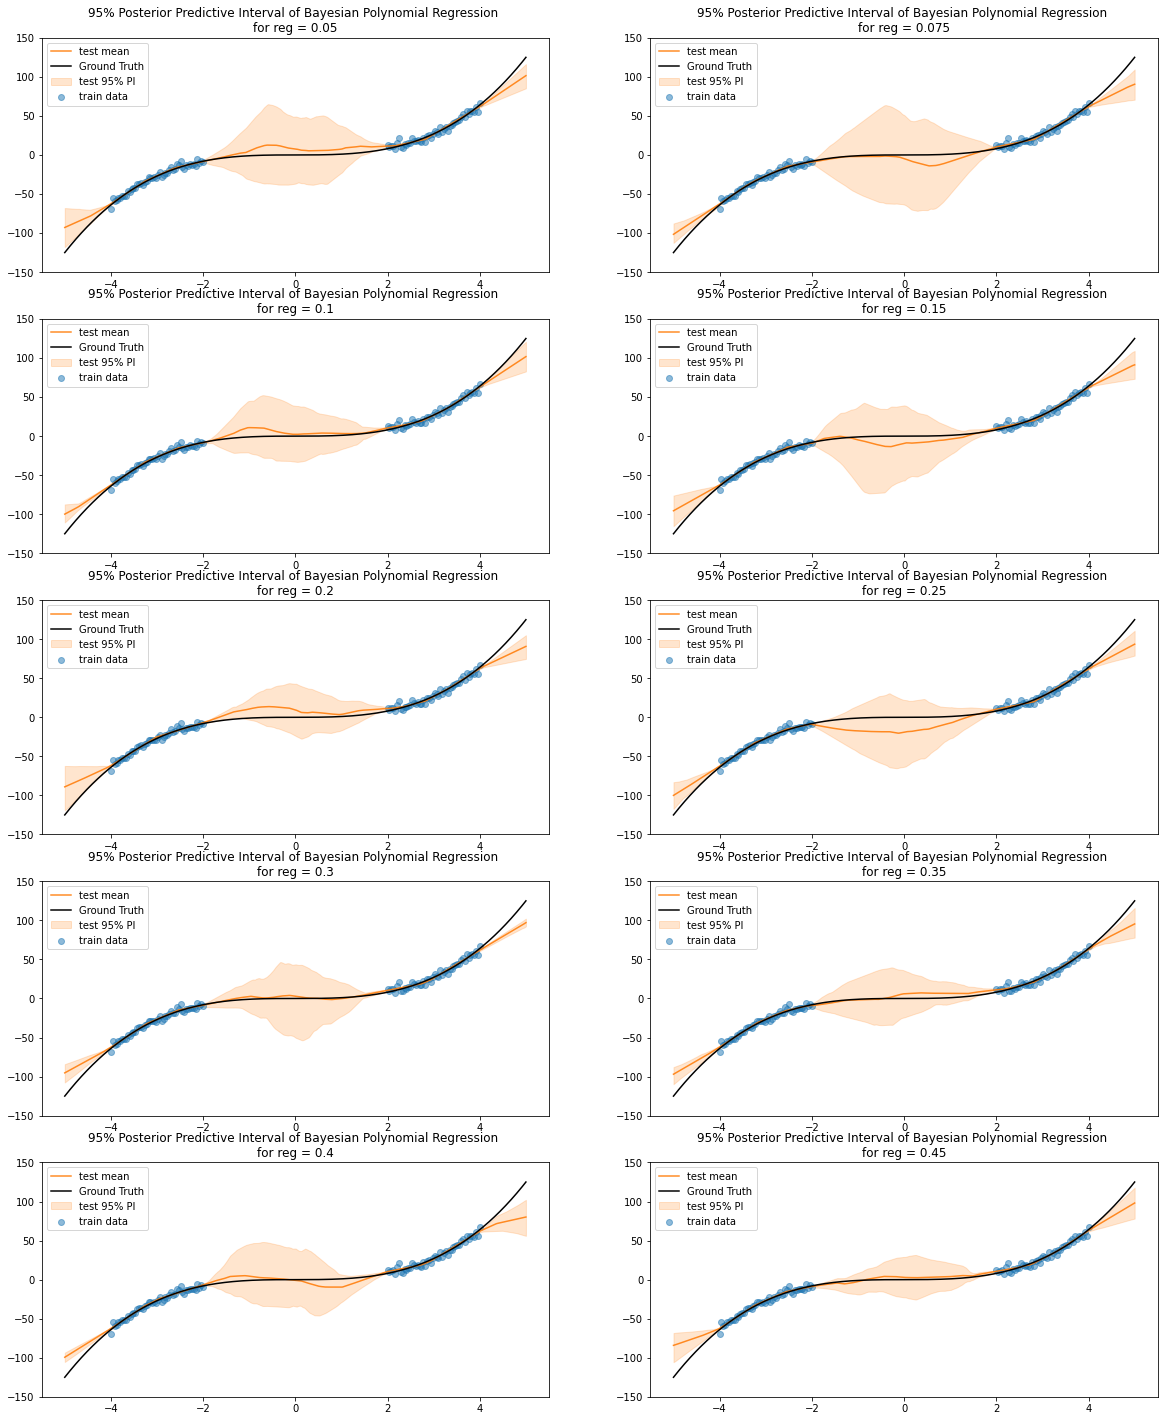

In [18]:
fig, axs = plt.subplots(5, 2, figsize = (20, 25))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    
    # Calulating percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test[0, :], pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test[0, :], pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test[0, :], x_test[0, :]**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval of Bayesian Polynomial Regression \nfor reg = {}".format(reg_params[i]))

plt.show()

## Random State

**Question:** How often does NLM result in good epsistemic uncertainty? 

### Regularization Parameter = 0.5

In [19]:
rand_states = np.random.randint(0, 1e5, size = 20)
rand_states

array([  959, 64876, 18039, 10929,  9521, 21582, 97160, 83581, 33258,
       60818, 72540, 46166, 44346, 50041, 86487, 46687, 65570, 46077,
       84235, 26346])

In [20]:
nlms = []

params['reg_param'] = 0.5

for rand_state in rand_states:
    print("Random seed: {}".format(rand_state))
    random = np.random.RandomState(rand_state)
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Random seed: 959
Iteration 0 loss 775.3840042366116; gradient mag: 2219.256281608266
Iteration 100 loss 116.9988346759919; gradient mag: 95.83836982521558
Iteration 200 loss 85.622782769503; gradient mag: 65.89544588198503
Iteration 300 loss 67.62793956345374; gradient mag: 44.092817877232726
Iteration 400 loss 54.29424081929751; gradient mag: 39.80846593200478
Iteration 500 loss 43.67487310499708; gradient mag: 28.13687064318912
Iteration 600 loss 37.62462176320522; gradient mag: 21.61857133814982
Iteration 700 loss 33.94630524853981; gradient mag: 16.53714747371632
Iteration 800 loss 31.66154978300529; gradient mag: 12.992470825875607
Iteration 900 loss 29.848060443760204; gradient mag: 10.915733018786794
Iteration 1000 loss 28.045194530966267; gradient mag: 11.943824776904457
Iteration 1100 loss 26.22068488925934; gradient mag: 11.970130659273158
Iteration 1200 loss 24.719876005172942; gradient mag: 8.321121683099488
Iteration 1300 loss 23.82063442547438; gradient mag: 6.13827890840

Iteration 1400 loss 22.549799698600054; gradient mag: 9.74020533062313
Iteration 1500 loss 22.180330940732738; gradient mag: 3.0012204170412042
Iteration 1600 loss 21.97909632219286; gradient mag: 2.5735949309638544
Iteration 1700 loss 21.814267702850064; gradient mag: 3.069029411730928
Iteration 1800 loss 21.662268688964232; gradient mag: 3.961676700817466
Iteration 1900 loss 21.478642858077258; gradient mag: 3.596095643956192
Iteration 2000 loss 21.331997235262072; gradient mag: 2.5216322842082954
Iteration 2100 loss 21.22782581742024; gradient mag: 2.538382848773918
Iteration 2200 loss 21.151866007260367; gradient mag: 4.132887739123243
Iteration 2300 loss 21.088007541517317; gradient mag: 1.6005696710761486
Iteration 2400 loss 21.03016656886217; gradient mag: 2.032379371799017
Iteration 2500 loss 20.976396253778645; gradient mag: 1.9115654731111127
Iteration 2600 loss 20.927381004164246; gradient mag: 2.204847490615692
Iteration 2700 loss 20.87886600923319; gradient mag: 3.26181004

Iteration 2800 loss 20.83666115577143; gradient mag: 1.4653869446274987
Iteration 2900 loss 20.735038192245508; gradient mag: 2.017244241491524
Iteration 3000 loss 20.626345759588347; gradient mag: 2.5458504060160627
Iteration 3100 loss 20.514429909148795; gradient mag: 1.3939181734671455
Iteration 3200 loss 20.40214620541836; gradient mag: 1.6185789074308456
Iteration 3300 loss 20.298267477123467; gradient mag: 1.310147541205559
Iteration 3400 loss 20.1684320617047; gradient mag: 1.5588215100714835
Iteration 3500 loss 20.067957655271876; gradient mag: 3.180478919660461
Iteration 3600 loss 19.970783145702367; gradient mag: 1.1005296296157165
Iteration 3700 loss 19.857138247654287; gradient mag: 1.900747886235236
Iteration 3800 loss 19.757091767065432; gradient mag: 1.6466990825409065
Iteration 3900 loss 19.667779403366865; gradient mag: 2.5091028504124178
Iteration 4000 loss 19.57913215142756; gradient mag: 1.3063995614618116
Iteration 4100 loss 19.491398334634347; gradient mag: 2.1463

Iteration 4200 loss 18.632253250156726; gradient mag: 2.0088086440781683
Iteration 4300 loss 18.516787848427356; gradient mag: 2.1939288377718813
Iteration 4400 loss 18.401159494890038; gradient mag: 3.128966198081864
Iteration 4500 loss 18.283611010002915; gradient mag: 2.207493713042554
Iteration 4600 loss 18.165925199569884; gradient mag: 2.2682031140719308
Iteration 4700 loss 18.04569844216647; gradient mag: 2.565404247643003
Iteration 4800 loss 17.927091580833363; gradient mag: 4.862576962003679
Iteration 4900 loss 17.804830159857968; gradient mag: 3.0735942296712238

Random seed: 83581
Iteration 0 loss 1772.2361970287234; gradient mag: 3840.96779603437
Iteration 100 loss 149.8125321110258; gradient mag: 619.2880327330969
Iteration 200 loss 78.4451312829504; gradient mag: 88.26162659201476
Iteration 300 loss 67.38432283016374; gradient mag: 73.45363180841234
Iteration 400 loss 58.7272449458109; gradient mag: 37.982352896943546
Iteration 500 loss 52.91747033770304; gradient mag: 33

Iteration 600 loss 27.680148280651416; gradient mag: 10.833340626379721
Iteration 700 loss 25.9327318892717; gradient mag: 6.834916565282001
Iteration 800 loss 24.085581416779185; gradient mag: 6.7480171381936005
Iteration 900 loss 23.055257412677065; gradient mag: 3.998795635043799
Iteration 1000 loss 22.48147583483154; gradient mag: 4.95029821428391
Iteration 1100 loss 22.038276959941996; gradient mag: 3.2361706269405066
Iteration 1200 loss 21.7332709193689; gradient mag: 2.2194942712323376
Iteration 1300 loss 21.512990021461686; gradient mag: 2.0406848773281547
Iteration 1400 loss 21.340723307071954; gradient mag: 2.0156018328970817
Iteration 1500 loss 21.16616900365456; gradient mag: 3.1150783941594016
Iteration 1600 loss 21.003776763852347; gradient mag: 2.376421438997567
Iteration 1700 loss 20.868563571766668; gradient mag: 3.201968915952137
Iteration 1800 loss 20.74517699002718; gradient mag: 3.396465854363755
Iteration 1900 loss 20.63371400694055; gradient mag: 2.64339070736253

Iteration 2000 loss 18.995576028792634; gradient mag: 1.716261810237098
Iteration 2100 loss 18.848649963541725; gradient mag: 1.5444277372451563
Iteration 2200 loss 18.737371160455414; gradient mag: 1.9939640262854283
Iteration 2300 loss 18.63024082927426; gradient mag: 1.840789994075041
Iteration 2400 loss 18.53835867256315; gradient mag: 3.9987043108707376
Iteration 2500 loss 18.453932302618107; gradient mag: 1.5278096954640428
Iteration 2600 loss 18.376070959968402; gradient mag: 1.4051495286643465
Iteration 2700 loss 18.300970371199593; gradient mag: 2.4369054089665023
Iteration 2800 loss 18.228277326532144; gradient mag: 1.6314567924638188
Iteration 2900 loss 18.158675162230328; gradient mag: 1.8640248399774024
Iteration 3000 loss 18.0908192196378; gradient mag: 1.5409085953998207
Iteration 3100 loss 18.025282756001275; gradient mag: 3.4991401284460504
Iteration 3200 loss 17.96041830616059; gradient mag: 1.4562161585593696
Iteration 3300 loss 17.896989608309045; gradient mag: 1.37

Iteration 3400 loss 20.02976601349204; gradient mag: 2.7219707733051415
Iteration 3500 loss 19.958336249048696; gradient mag: 2.8151636584628115
Iteration 3600 loss 19.886734745117007; gradient mag: 0.795355986471155
Iteration 3700 loss 19.815620647394823; gradient mag: 1.5550250654866575
Iteration 3800 loss 19.74371097636191; gradient mag: 0.957638922355061
Iteration 3900 loss 19.671649322723024; gradient mag: 2.4168505653701775
Iteration 4000 loss 19.598585307365695; gradient mag: 0.8721606414538612
Iteration 4100 loss 19.524990745432092; gradient mag: 0.8144965672376832
Iteration 4200 loss 19.45099847084; gradient mag: 1.4168336326942252
Iteration 4300 loss 19.37633866950058; gradient mag: 1.0904704582063716
Iteration 4400 loss 19.30113646178995; gradient mag: 3.3167048782512536
Iteration 4500 loss 19.235795636835014; gradient mag: 20.52585179028491
Iteration 4600 loss 19.14808840510188; gradient mag: 1.6726712317058428
Iteration 4700 loss 19.070705221436587; gradient mag: 2.1794897

Iteration 4800 loss 16.894062593537317; gradient mag: 6.285576303410316
Iteration 4900 loss 16.80891192370333; gradient mag: 4.047348462444116

Random seed: 65570
Iteration 0 loss 1280.0789521149354; gradient mag: 3327.3185610907417
Iteration 100 loss 203.67316286100018; gradient mag: 371.40360539261656
Iteration 200 loss 164.51315661397524; gradient mag: 63.81242964558037
Iteration 300 loss 137.67281672884192; gradient mag: 70.76218167585469
Iteration 400 loss 113.8194411191532; gradient mag: 56.73633624445913
Iteration 500 loss 92.47368262175732; gradient mag: 51.17451189172442
Iteration 600 loss 74.28409003015577; gradient mag: 46.12415146726127
Iteration 700 loss 56.235611767137605; gradient mag: 60.32469118319464
Iteration 800 loss 44.1545931910853; gradient mag: 29.71403070326546
Iteration 900 loss 36.91521991905583; gradient mag: 23.48758114286835
Iteration 1000 loss 31.812727481104513; gradient mag: 17.911178914379903
Iteration 1100 loss 28.588434008769198; gradient mag: 13.662

Iteration 1200 loss 26.616595400196807; gradient mag: 12.869970535775254
Iteration 1300 loss 25.578460197562528; gradient mag: 8.576289490418658
Iteration 1400 loss 24.721036886359713; gradient mag: 8.453286391470531
Iteration 1500 loss 24.04612702074865; gradient mag: 9.876027866491498
Iteration 1600 loss 23.5128374322994; gradient mag: 5.640973020437502
Iteration 1700 loss 23.07501452464072; gradient mag: 4.693796183250524
Iteration 1800 loss 22.68445531861545; gradient mag: 4.1890193567522624
Iteration 1900 loss 22.304409053805315; gradient mag: 4.042216596890835
Iteration 2000 loss 21.98507752976731; gradient mag: 4.081635611857775
Iteration 2100 loss 21.7298005919078; gradient mag: 3.113020693686722
Iteration 2200 loss 21.53468595606156; gradient mag: 4.058005896745439
Iteration 2300 loss 21.366930634152553; gradient mag: 3.480504144143185
Iteration 2400 loss 21.177254424698248; gradient mag: 5.633287086743878
Iteration 2500 loss 21.05530407055587; gradient mag: 3.574530088868491


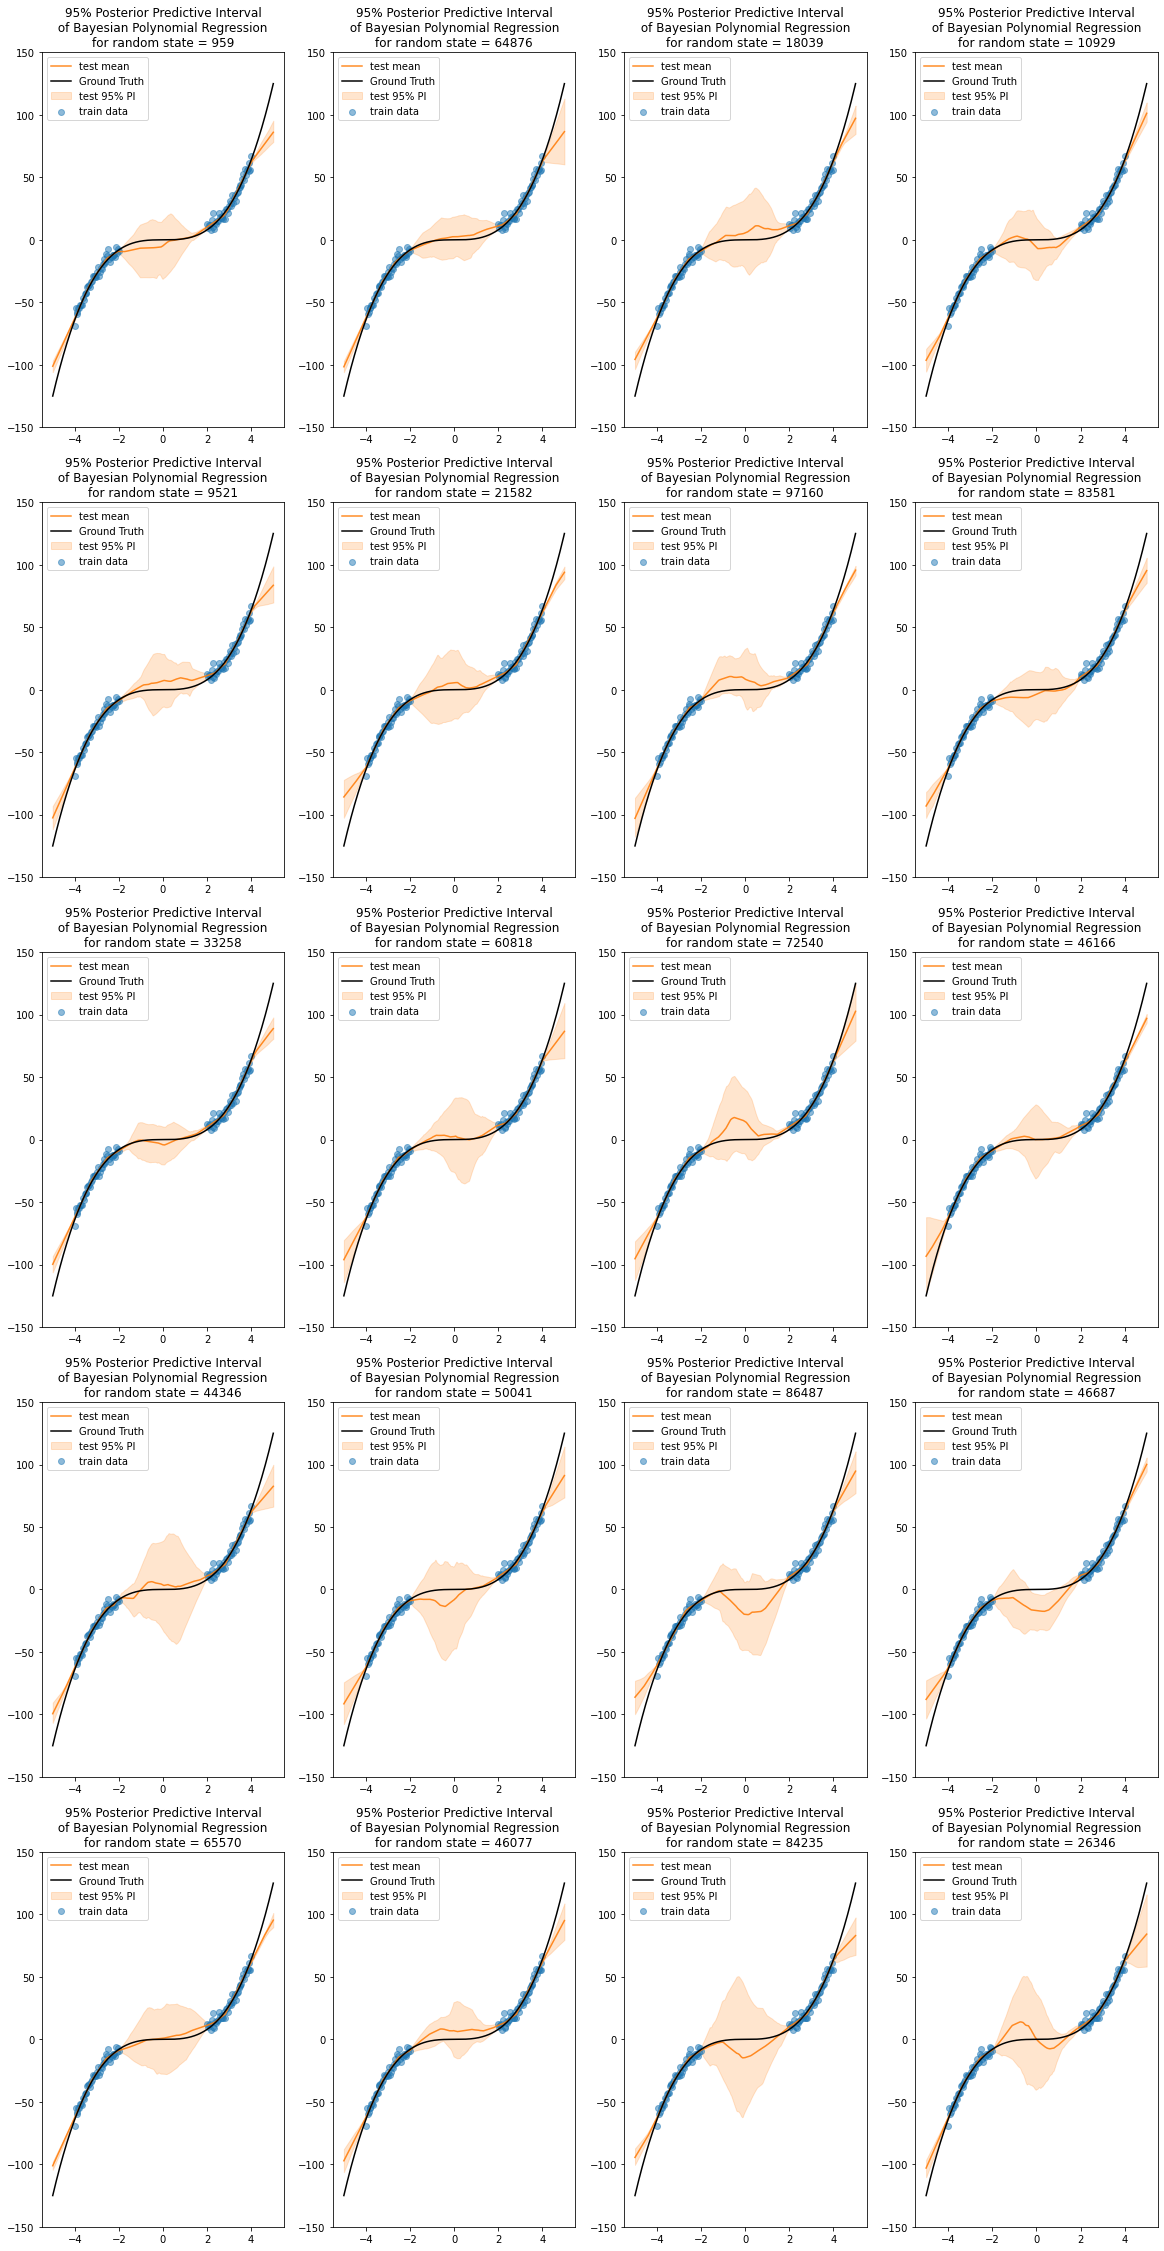

In [21]:
fig, axs = plt.subplots(5, 4, figsize = (20, 40))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    
    # Calulating percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test[0, :], pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test[0, :], pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test[0, :], x_test[0, :]**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval\n of Bayesian Polynomial Regression \nfor random state = {}".format(rand_states[i]))

plt.show()

About 10 of the 20 models give what we would consider good epistemic uncertainty behaviors. 

### Regularization Parameter = 0

In [22]:
rand_states = np.random.randint(0, 1e5, size = 20)

params['reg_param'] = 0

nlms = []

for rand_state in rand_states:
    print("Random seed: {}".format(rand_state))
    random = np.random.RandomState(rand_state)
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Random seed: 20320
Iteration 0 loss 6153.551960845009; gradient mag: 10378.13028180674
Iteration 100 loss 612.1837466668151; gradient mag: 2533.158087910287
Iteration 200 loss 124.18048423954495; gradient mag: 407.24681263923094
Iteration 300 loss 108.5426509072633; gradient mag: 59.066456149754075
Iteration 400 loss 105.16836702191554; gradient mag: 48.14325133378323
Iteration 500 loss 101.64010179250722; gradient mag: 47.19281608064911
Iteration 600 loss 97.84851972754832; gradient mag: 46.263984714588396
Iteration 700 loss 93.85214077196548; gradient mag: 45.47445637724952
Iteration 800 loss 89.70132579562232; gradient mag: 44.33720336963512
Iteration 900 loss 85.44229595940196; gradient mag: 43.421948650815814
Iteration 1000 loss 81.1017431924518; gradient mag: 42.417079060188286
Iteration 1100 loss 72.34386584775854; gradient mag: 43.3933120573182
Iteration 1200 loss 65.45488469997086; gradient mag: 41.7737969607639
Iteration 1300 loss 58.68468068729778; gradient mag: 39.756792189

Iteration 1400 loss 10.913129470176113; gradient mag: 4.70358385886335
Iteration 1500 loss 10.548791062479895; gradient mag: 4.693717891735866
Iteration 1600 loss 10.142315608391186; gradient mag: 4.659206783197617
Iteration 1700 loss 9.845880969300495; gradient mag: 3.378733392403871
Iteration 1800 loss 9.625025377217316; gradient mag: 3.48501762644703
Iteration 1900 loss 9.4517842676869; gradient mag: 2.072695858258638
Iteration 2000 loss 9.289421705498523; gradient mag: 2.469636136380394
Iteration 2100 loss 9.143272886957673; gradient mag: 2.7800718556177277
Iteration 2200 loss 9.003077071494793; gradient mag: 2.2921639675027907
Iteration 2300 loss 8.868997448846574; gradient mag: 1.919061022470314
Iteration 2400 loss 8.741615222282528; gradient mag: 2.4823352665861744
Iteration 2500 loss 8.619706372848167; gradient mag: 1.6343446242865234
Iteration 2600 loss 8.501633408213168; gradient mag: 1.9146441844671196
Iteration 2700 loss 8.389413587489; gradient mag: 1.9561516999223
Iterati

Iteration 2800 loss 9.214348378334549; gradient mag: 1.9223141853687207
Iteration 2900 loss 9.0659044206132; gradient mag: 2.374511512385238
Iteration 3000 loss 8.921251766324215; gradient mag: 1.8011004642796853
Iteration 3100 loss 8.785036649580238; gradient mag: 1.7062914756900234
Iteration 3200 loss 8.657808549783258; gradient mag: 1.6317948875391104
Iteration 3300 loss 8.540282143080713; gradient mag: 1.6293983661131655
Iteration 3400 loss 8.431708691465236; gradient mag: 2.5862513261380666
Iteration 3500 loss 8.332809602522435; gradient mag: 2.239222673558031
Iteration 3600 loss 8.245473191844857; gradient mag: 2.66327245317685
Iteration 3700 loss 8.161895331821192; gradient mag: 2.398690919932363
Iteration 3800 loss 8.08010770401992; gradient mag: 1.7597678386040219
Iteration 3900 loss 8.000296648119338; gradient mag: 3.2534562036205212
Iteration 4000 loss 7.931600077700932; gradient mag: 2.2607826660771058
Iteration 4100 loss 7.871514476661547; gradient mag: 2.2917674860801074


Iteration 4200 loss 7.781137472845287; gradient mag: 4.420055067273416
Iteration 4300 loss 7.777886918218545; gradient mag: 1.2664627395039967
Iteration 4400 loss 7.775947099993263; gradient mag: 2.7614893525078648
Iteration 4500 loss 7.774601960076137; gradient mag: 3.7182220178905103
Iteration 4600 loss 7.772671704133378; gradient mag: 4.4932700236240946
Iteration 4700 loss 7.76996735024963; gradient mag: 1.773366444895872
Iteration 4800 loss 7.768037985773001; gradient mag: 1.7516025872982495
Iteration 4900 loss 7.766577651979841; gradient mag: 2.684470574602429

Random seed: 56083
Iteration 0 loss 9050.072095434673; gradient mag: 11293.89793591558
Iteration 100 loss 1293.4425465539525; gradient mag: 3994.320868742967
Iteration 200 loss 160.3124581601505; gradient mag: 798.3729266360949
Iteration 300 loss 114.90433894708434; gradient mag: 87.96606174983843
Iteration 400 loss 108.5604850960678; gradient mag: 62.62550771155397
Iteration 500 loss 101.66584554167709; gradient mag: 56.46

Iteration 700 loss 82.42578725797048; gradient mag: 66.8517679654649
Iteration 800 loss 71.11560646325103; gradient mag: 62.076560668934036
Iteration 900 loss 61.019644199076076; gradient mag: 56.899406105772734
Iteration 1000 loss 52.44618926332491; gradient mag: 51.33868349031538
Iteration 1100 loss 45.40118776759302; gradient mag: 45.92787098681315
Iteration 1200 loss 39.634244796643344; gradient mag: 41.38901926237971
Iteration 1300 loss 34.77504141217296; gradient mag: 37.33070366733044
Iteration 1400 loss 30.805162513000127; gradient mag: 33.99172496388526
Iteration 1500 loss 27.40262241688054; gradient mag: 31.874495130298648
Iteration 1600 loss 24.261918748175354; gradient mag: 28.925771002997696
Iteration 1700 loss 21.5904401000163; gradient mag: 27.575096875156348
Iteration 1800 loss 19.22078688237543; gradient mag: 23.95231222789409
Iteration 1900 loss 17.40529864627274; gradient mag: 19.877729088831035
Iteration 2000 loss 15.990029139627659; gradient mag: 17.119457698742107

Iteration 2200 loss 10.308174799282531; gradient mag: 2.751126225988008
Iteration 2300 loss 10.079780337845582; gradient mag: 2.936741407299465
Iteration 2400 loss 9.863169399330554; gradient mag: 2.4220578043049437
Iteration 2500 loss 9.65508187955542; gradient mag: 2.6480310911024585
Iteration 2600 loss 9.446477488868869; gradient mag: 2.63930906103053
Iteration 2700 loss 9.1890074937318; gradient mag: 3.351121727906001
Iteration 2800 loss 8.969431372749753; gradient mag: 2.3107228606626813
Iteration 2900 loss 8.781138142326563; gradient mag: 3.0691986137031746
Iteration 3000 loss 8.60331682282456; gradient mag: 2.1879563329309555
Iteration 3100 loss 8.438475762308927; gradient mag: 3.1511865034027515
Iteration 3200 loss 8.288079867354979; gradient mag: 2.4363790799816583
Iteration 3300 loss 7.869142976555189; gradient mag: 3.5505383623077225
Iteration 3400 loss 7.763645497398171; gradient mag: 2.204483832384576
Iteration 3500 loss 7.683704248719576; gradient mag: 5.202760208742224
I

Iteration 3700 loss 9.059505765440626; gradient mag: 4.01670191320837
Iteration 3800 loss 8.942124277067116; gradient mag: 3.5614778273692425
Iteration 3900 loss 8.8439876546409; gradient mag: 4.080085048069489
Iteration 4000 loss 8.751164682796563; gradient mag: 3.6129755966040773
Iteration 4100 loss 8.66007987868481; gradient mag: 2.665033344499272
Iteration 4200 loss 8.570039478759288; gradient mag: 3.299754156381074
Iteration 4300 loss 8.480385918867576; gradient mag: 2.936523006313442
Iteration 4400 loss 8.391206776244744; gradient mag: 3.212599041833706
Iteration 4500 loss 8.302538322508466; gradient mag: 3.2706229209620457
Iteration 4600 loss 8.21489775165374; gradient mag: 2.8952175519894716
Iteration 4700 loss 8.127802680335847; gradient mag: 2.483803192140926
Iteration 4800 loss 8.042834748553787; gradient mag: 4.135715461515146
Iteration 4900 loss 7.959371297688586; gradient mag: 3.692478010608384

Random seed: 30765
Iteration 0 loss 7999.208530752259; gradient mag: 10173.79

Iteration 100 loss 104.08796067509749; gradient mag: 201.6403974027946
Iteration 200 loss 57.30113642571626; gradient mag: 53.667074372308505
Iteration 300 loss 45.70329665010972; gradient mag: 43.92048458929991
Iteration 400 loss 37.593665602073926; gradient mag: 38.457063896095086
Iteration 500 loss 30.636869036019124; gradient mag: 33.577221987893665
Iteration 600 loss 25.515935086424488; gradient mag: 28.23641858659527
Iteration 700 loss 21.58213622335139; gradient mag: 22.40428656308876
Iteration 800 loss 18.628521491022074; gradient mag: 20.023444561948065
Iteration 900 loss 16.311845989709482; gradient mag: 15.358902649030789
Iteration 1000 loss 14.482032227589244; gradient mag: 12.906781272216891
Iteration 1100 loss 13.08196792359141; gradient mag: 10.370074334568365
Iteration 1200 loss 11.98643167005484; gradient mag: 8.788972470749169
Iteration 1300 loss 11.091944886287274; gradient mag: 8.320917580328741
Iteration 1400 loss 10.35669496594812; gradient mag: 11.565965916164606

Iteration 1600 loss 13.712492664982094; gradient mag: 3.6659917096638996
Iteration 1700 loss 13.613907695542341; gradient mag: 2.759513521971064
Iteration 1800 loss 13.540788725856757; gradient mag: 3.3287352171746605
Iteration 1900 loss 13.482957316314085; gradient mag: 2.986205381770325
Iteration 2000 loss 13.43512398775945; gradient mag: 2.918700561288032
Iteration 2100 loss 13.362768111659511; gradient mag: 6.0102811369342986
Iteration 2200 loss 13.292221719113638; gradient mag: 1.854101675547559
Iteration 2300 loss 13.260163258069952; gradient mag: 2.33139853284589
Iteration 2400 loss 13.229354263985861; gradient mag: 1.212412145968069
Iteration 2500 loss 13.19803878225255; gradient mag: 1.4197298812795374
Iteration 2600 loss 13.163546528236662; gradient mag: 2.473280944294894
Iteration 2700 loss 13.124866436615623; gradient mag: 1.1983005308458488
Iteration 2800 loss 13.080993556994686; gradient mag: 1.0938020210416965
Iteration 2900 loss 13.030517608764997; gradient mag: 2.64474

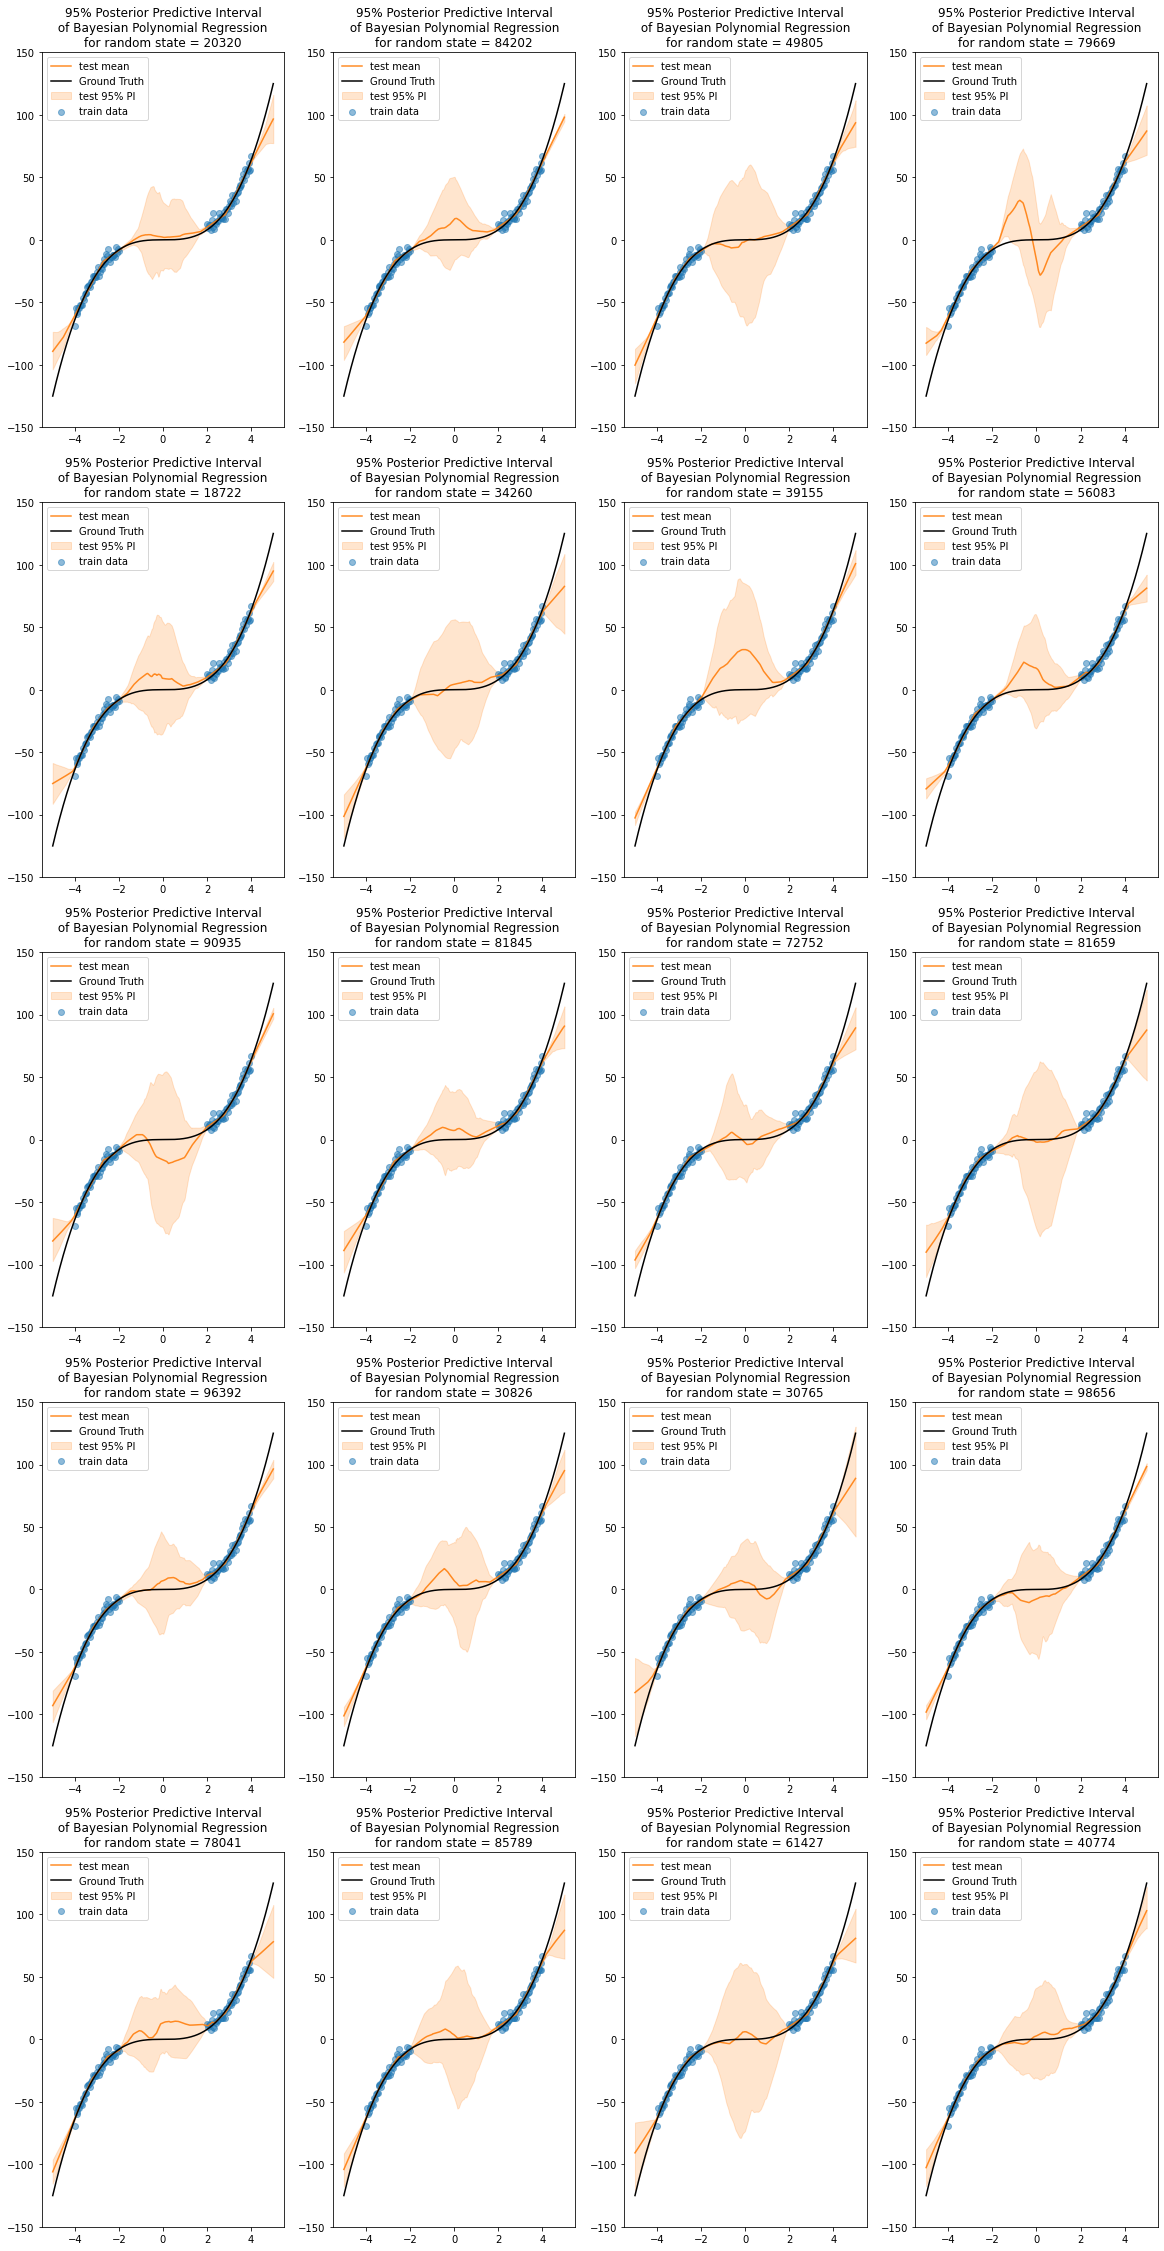

In [23]:
fig, axs = plt.subplots(5, 4, figsize = (20, 40))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    
    # Calulating percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test[0, :], pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test[0, :], pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test[0, :], x_test[0, :]**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval\n of Bayesian Polynomial Regression \nfor random state = {}".format(rand_states[i]))

plt.show()

About 6 out of the 20 models give what we would consider good epistemic uncertainty behavior. 